<a href="https://colab.research.google.com/github/omkarsp644/Heart-Attack-And-Diabetes-prediction-using-python/blob/master/TATA_MOTORS_Stock_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
%cd /content/drive/My Drive/Stock_Price_Prediction

/content/drive/My Drive/Stock_Price_Prediction


In [39]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:

def getmonth(s):
    switcher = {
        "Jan": '01',
        "Feb": '02',
        "Mar": '03',
        "Apr": '04',
        "May": '05',
        "Jun": '06',
        "Jul": '07',
        "Aug": '08',
        "Sep": '09',
        "Oct": '10',
        "Nov": '11',
        "Dec": '12'
    }
    return switcher.get(s, "month")
        

def converttodate(d):
  month= getmonth(d.split(", ")[0].split(" ")[1])
  day=d.split(", ")[0].split(" ")[2]
  year=d.split(", ")[1]

  return day+"-"+month+"-"+year

df = pd.read_csv('TATA_MOTORS.csv')
df=df[::-1]
df = pd.DataFrame(df)
print(df['date'][0])
df['date'] = df['date'].apply(lambda x:converttodate(x))

  
# df['date'] = pd.to_datetime(df['date'], format='%b%d%Y')

df.set_index('date',inplace=True)


 Jan 25, 2019



In [41]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(['date','open','high','low','close','volume']),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.index,df.open, df.high, df.low, df.close,df.volume],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [43]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

fig.add_trace(
    Line(x=df.index, y=df.open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.high),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.close),
    row=4, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

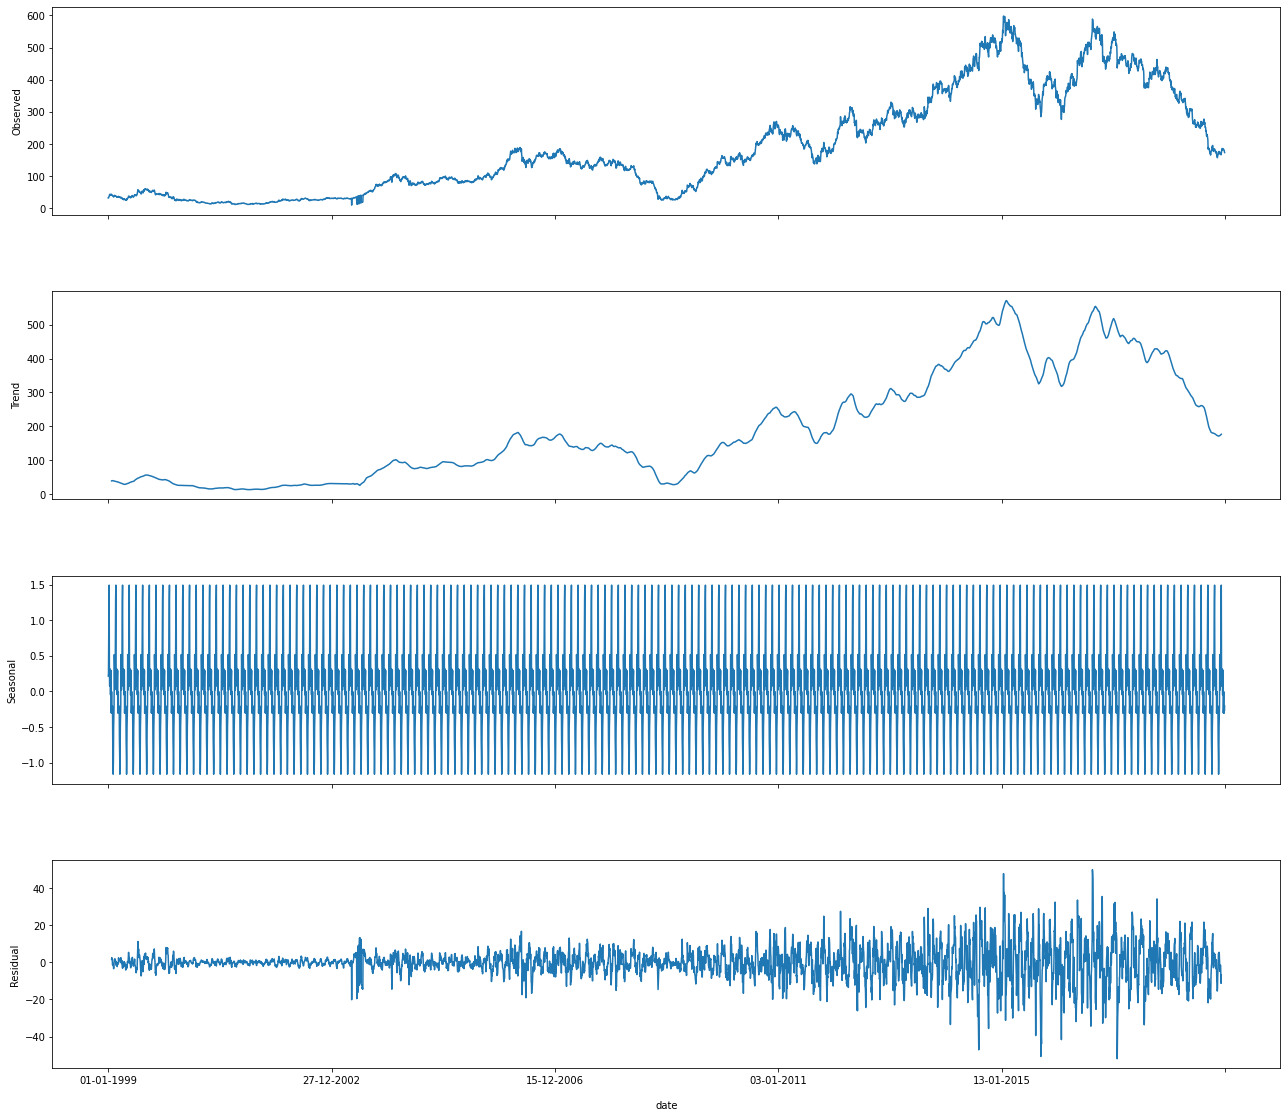

In [44]:
result = seasonal_decompose(df.close.head(5000), model='additive', freq = 30)
fig = go.Figure()  
fig = result.plot()  
fig.set_size_inches(20, 19)

In [45]:
''' Example candle stick code'''
open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data,
               increasing_line_color= 'green', decreasing_line_color= 'red')])

fig.show()


In [46]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

len(df)

5000

In [48]:
new_df = pd.DataFrame()
new_df = df['close']
new_df.index = df.index

In [55]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_df.values

train_data=final_dataset[0:4500,]
valid_data=final_dataset[4500:,]



train_df = pd.DataFrame()
valid_df = pd.DataFrame()
train_df['Close'] = train_data
train_df.index = new_df[0:4500].index

valid_df['Close'] = valid_data
valid_df.index = new_df[4500:].index





scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset.reshape(-1,1))

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [56]:
len(final_dataset)

len(valid_df)

500

In [57]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_df[len(new_df)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

lstm_model.summary()

4440/4440 - 80s - loss: 0.0011 - 80s/epoch - 18ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [58]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [59]:
valid_df['Predictions']=predicted_closing_price

In [60]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                    mode='lines',
                    name='Siemens Train Data'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Close'],
                    mode='lines',
                    name='Siemens Valid Data'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Predictions'],
                    mode='lines',
                    name='Prediction'))

In [61]:
from sklearn.metrics import mean_squared_error
print('The Mean Squared Error is',mean_squared_error(valid_df['Close'].values,valid_df['Predictions'].values))

The Mean Squared Error is 133.90194028941988


In [62]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Close'],
                    mode='lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Predictions'],
                    mode='lines',
                    name='Predicted'))